# SKA Test Case Demo

## Installtion

Requires installation of the praetor python package

```pip install praetor```

## Generation

Add the praetor tracer to the start of your script (after imports)

ouput_directory - where the provenance will be generated
block_list_mod - is a list of modules which will be ignored by the provenance tracker


```
from praetor.praetor import CallTracer
import sys

tracer = CallTracer(output_directory="./output",  block_list_mod=["numpy"])
sys.setprofile(tracer)
```



## Transformation

Once executed, the code will now create a json directory within the output directory and two files within that: the agent file and main file.

The following command should be used to merge the two files and transform into turtle format:

```create_tt.py --main main_file_name.json --agent agent_json.json```

This will create main_file_name.ttl, which can be uploaded to the database.

## Start the database

```docker pull secoresearch/fuseki```

```docker run --rm -it -p 3030:3030 --name fuseki -e ADMIN_PASSWORD=admin -e ENABLE_DATA_WRITE=true -e ENABLE_UPDATE=true -e ENABLE_UPLOAD=true -e QUERY_TIMEOUT=60000 secoresearch/fuseki```


The database will now be available at localhost:3030

## Interacting with the Provenance

In [1]:
from praetor import prov_rdf
import io
from rdflib import Graph
from rdflib.tools.rdf2dot import rdf2dot
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
import pandas as pd

In [2]:
prov_file = "./SWF-010-T1_provenance_2c314be8-7cd8-417d-990c-dfea7727c586.ttl"

In [3]:


g = Graph()
g.parse(prov_file, format="turtle")

stream = io.StringIO()
rdf2dot(g, stream)

dot_graph = pydotplus.graph_from_dot_data(stream.getvalue())
dot_graph.write_svg("graph.svg")  # or .write_svg(...)

True

In [3]:
prov_name = prov_rdf.upload_provenance(prov_file)

### Show all functions which happened prior to a an input being used in the pipeline

In [5]:
input_name =  "../../data//...-blanked.fits"
df = prov_rdf.track_functions(prov_name, input_name=input_name)

In [6]:
df

,start.value,name.value
0,2026-01-27 15:22:42.347499,main
1,2026-01-27 15:22:42.347784,exists
2,2026-01-27 15:22:42.347875,process_image


### Show the reverse : all functions which happened after an input was used in the pipeline

In [7]:
input_name =  "../../data//...-blanked.fits"
df = prov_rdf.track_functions(prov_name, input_name=input_name, trace_back=False)

In [8]:
df

,start.value,name.value
2,2026-01-27 15:22:42.347875,process_image
3,2026-01-27 15:22:42.348239,parent
4,2026-01-27 15:22:42.348128,load_pars
5,2026-01-27 15:22:42.348318,_handle_fromlist
6,2026-01-27 15:22:42.348447,_find_and_load
7,2026-01-27 15:22:42.348478,__init__
8,2026-01-27 15:22:42.348566,__enter__
9,2026-01-27 15:22:42.348597,_get_module_lock
10,2026-01-27 15:22:42.348624,__init__
11,2026-01-27 15:22:42.348779,acquire


### Show all functions which executed prior to an output being produced

In [9]:
output_name = "FileFinder(/...ite-packages)"
df = prov_rdf.track_functions(prov_name, output_name=output_name)

In [10]:
df

,start.value,name.value
0,2026-01-27 15:22:42.347499,main
1,2026-01-27 15:22:42.347784,exists
2,2026-01-27 15:22:42.347875,process_image
3,2026-01-27 15:22:42.348239,parent
4,2026-01-27 15:22:42.348128,load_pars
5,2026-01-27 15:22:42.348318,_handle_fromlist
6,2026-01-27 15:22:42.348447,_find_and_load
7,2026-01-27 15:22:42.348478,__init__
8,2026-01-27 15:22:42.348566,__enter__
9,2026-01-27 15:22:42.348597,_get_module_lock


### Show all function executions after a specified one:

In [11]:
func_id="urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-417d-990c-dfea7727c586_140203633149968"
df = prov_rdf.track_functions(prov_name, function_id=func_id)

In [12]:
df

,start.value,name.value
0,2026-01-27 15:22:42.347499,main
1,2026-01-27 15:22:42.347784,exists
2,2026-01-27 15:22:42.347875,process_image
3,2026-01-27 15:22:42.348239,parent
4,2026-01-27 15:22:42.348128,load_pars
5,2026-01-27 15:22:42.348318,_handle_fromlist
6,2026-01-27 15:22:42.348447,_find_and_load
7,2026-01-27 15:22:42.348478,__init__
8,2026-01-27 15:22:42.348566,__enter__
9,2026-01-27 15:22:42.348597,_get_module_lock


### Function to retrieve inputs and/or outputs for: all instances of all functions, all instances of one function, one instance of one function

In [15]:
df = prov_rdf.user_defined_query(query)

In [16]:
df

,funcID.value,funcName.value,inputNames.value,inputValues.value,outputValues.value
0,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,main,NaN,NaN,NaN
1,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,exists,path,../../data//...10-T1/interim,True
3,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,process_image,input,../../data//...-blanked.fits,NaN
5,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,parent,self,ModuleSpec(na...interface.py),bdsf
7,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,load_pars,filename,../../data//...-blanked.fits,NaN
...,...,...,...,...,...
112,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,_verbose_message,message,trying {},None
114,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,<listcomp>,.0,<tuple_iterat...x7f835da642b0>,"[/home/h14471...site-packages, cPickle.pyc]"
116,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,__init__,self,<ModuleSpec instance at 0x7f835da64280>,None
117,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,__init__,name,cPickle,None


In [6]:
df = prov_rdf.function_query(prov_name, group_by="process_image")

In [ ]:
df

### Find all function executions from a specific module

In [8]:
mod_name = "genericpath"
df = prov_rdf.module_query(prov_name, mod_name)

In [9]:
df

,funcName.value,funcID.value,start.value,end.value
0,exists,urn_uuid:SWF-010-T1_provenance_2c314be8-7cd8-4...,2026-01-27T15:22:42.347784,2026-01-27T15:22:42.347829


### Graph showing all functions/modules and the amount of time spent running them

In [11]:
df = prov_rdf.duration_query(prov_name)

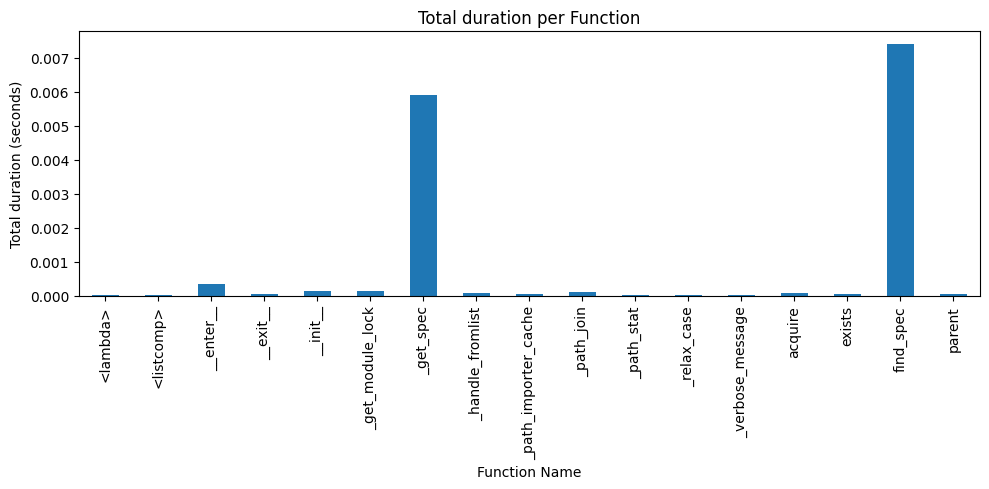

In [12]:
duration_per_name = df.groupby("funcName.value")["diff_sec"].sum()

# 2. Plot as a bar chart (histogram over categories)
ax = duration_per_name.plot(kind="bar", figsize=(10, 5))
ax.set_xlabel("Function Name")
ax.set_ylabel("Total duration (seconds)")
ax.set_title("Total duration per Function")
plt.tight_layout()
plt.show()

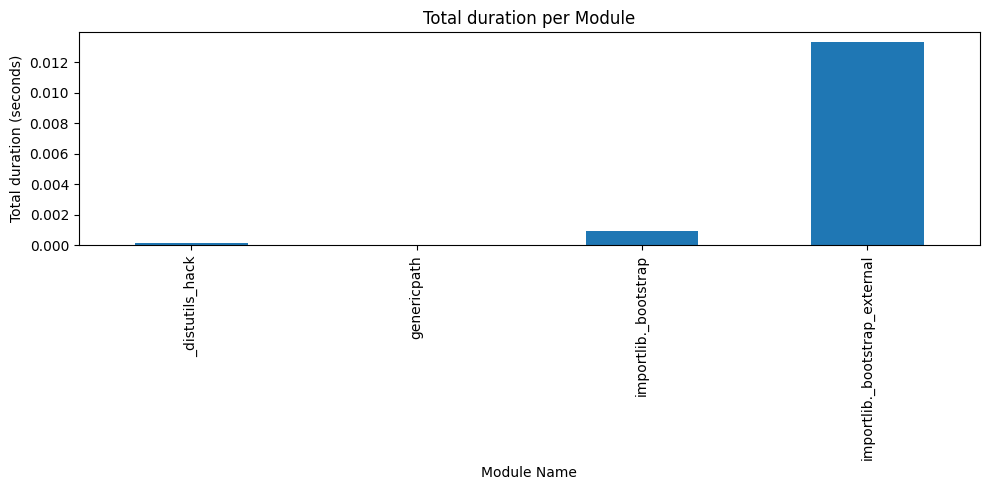

In [13]:
duration_per_name = df.groupby("module.value")["diff_sec"].sum()

# 2. Plot as a bar chart (histogram over categories)
ax = duration_per_name.plot(kind="bar", figsize=(10, 5))
ax.set_xlabel("Module Name")
ax.set_ylabel("Total duration (seconds)")
ax.set_title("Total duration per Module")
plt.tight_layout()
plt.show()

### Histogram of parameters

### Complete and exact re-run from the provenance including modules, versions, building a container supplying input information - record pipeline script, initial arguments?